Dave Brunner

![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AnTeDe Lab 6: Applications of word2vec
## Objective
* Compare pre-trained word2vec models with models trained on your workstation, on word similarity and analogy tasks.	

## General instructions
* You can do the lab alone or in groups of two students.
* Please write the required code, but also reply explicitly to the questions, as Python comments in code cells or text in markdown cells. 
* To submit your practical work, please make sure all cells are executed, then save and zip the notebook, and submit it as homework on [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).
* Useful documentation: [section on word2vec in Gensim](https://radimrehurek.com/gensim/models/word2vec.html) as well as the [section on KeyedVectors in Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html).
* Training can be done locally if you have at least 16 GB of memory (it takes minutes, not hours), or using [Google Colab](https://colab.research.google.com/).

## 1. Testing a word2vec model trained on Google News
Install Gensim the latest version of Gensim, for instance by running in your Conda environment `pip install --upgrade gensim`. 

In [85]:
import gensim, os
from gensim import downloader

In [86]:
gensim.downloader.load("word2vec-google-news-300")

<font color='green'>**Question**: Where is the model stored on your computer?  What is the size of the file?  Please store the absolute path in a variable called `path_to_model_file`, and use `os.path.getsize` to display the size converted in gigabytes with two decimals. <font>

In [87]:
path_to_model_file = '/Users/davebrunner/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
size_in_bytes = os.path.getsize(path_to_model_file)
print(f"The file is {size_in_bytes / 1024 ** 3:.2f} GB")

The file is 1.62 GB


In [88]:
from gensim.models import KeyedVectors

wv_model = gensim.models.KeyedVectors.load_word2vec_format(path_to_model_file, binary=True)  # C bin format

<font color='green'>**Question**: What is the memory size of the process corresponding to this notebook?  Please simply write the value you obtain from any OS-specific utility that you wish to use for this purpose. <font>

The memory size of the process (whole of PyCharm) is 1.9 GB

<font color='green'>**Question**: What is the size of the vocabulary of this model, i.e., how many words does it know? <font>

In [89]:
# Please write the Python code needed to display the vocabulary size and execute it.
print(f"The vocabulary size is {len(wv_model.key_to_index)}")

The vocabulary size is 3000000


<font color='green'>**Question**: Compare the vocabulary size with the number of words in an English dictionary. How do you explain the difference?
    
Write a function which takes as input a given word and outputs whether the word is part of the vocabulary or not. Display 7 words which are in the model's vocabulary, and 3 that are not, thereby illustrating the difference in vocabulary size. <font>

The Oxford English Dictionary contains 273,000 words. This is quiet similar to the vocabulary size of the Google News model, which contains 300,000 words. The difference is due to the fact that the Google News model was trained on a large corpus of text, which allows it to have a larger vocabulary than a standard English dictionary.

In [90]:
in_vocab = ['dog', 'cat', 'house', 'car', 'tree', 'computer', 'book']
not_in_vocab = ['accismus', 'battology', 'cacoethes']


def is_in_vocab(word):
    return word in wv_model.key_to_index


print("Words in the vocabulary:")
[print(f"{word} is in the vocabulary: {is_in_vocab(word)}") for word in in_vocab]
print("\nWords not in the vocabulary:")
[print(f"{word} is in the vocabulary: {is_in_vocab(word)}") for word in not_in_vocab]

Words in the vocabulary:
dog is in the vocabulary: True
cat is in the vocabulary: True
house is in the vocabulary: True
car is in the vocabulary: True
tree is in the vocabulary: True
computer is in the vocabulary: True
book is in the vocabulary: True

Words not in the vocabulary:
accismus is in the vocabulary: False
battology is in the vocabulary: False
cacoethes is in the vocabulary: False


[None, None, None]

<font color='green'>**Question**: What is the size of the vector space for this word2vec model, i.e. the dimensionality of the embedding space? Use two methods to determine the size: using the vector of a word from the vocabulary, and directly using the shape of the model.<font>

In [110]:
dimension = len(wv_model['dog'])
print(f"The dimensionality of the embedding space is {dimension}")
print(f"The dimensionality of the embedding space is {wv_model.vectors.shape[1]}")

The dimensionality of the embedding space is 300
The dimensionality of the embedding space is 300


## 2. Using word2vec trained on Google News for word similarity
In this section, you are going to use word vectors to compute (cosine) similarity between words (use the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation).  You will experiment with three tasks: 

(a) rank a small number of word pairs by decreasing similarity;  
(b) test the model on the WordSimilarity-353 set;  
(c) test the model on the analogy task.

<font color='green'>**Question**: What is the similarity for the word pairs given below? Sort the word pairs given below by decreasing similarity, i.e., most similar first. Display the similarity value found by word2vec, with 2 decimals. <font>

In [92]:
test_pairs = [('car', 'automobile'), ('car', 'bike'), ('car', 'oil'), ('car', 'pedal'),
              ('bike', 'pedal'), ('bike', 'bicycle'), ('oil', 'gas'), ('car', 'bus')]
similarities = [(pair, wv_model.similarity(pair[0], pair[1])) for pair in test_pairs]
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
[print(f"{pair[0]} and {pair[1]} have a similarity of {sim:.2f}") for pair, sim in sorted_similarities]

bike and bicycle have a similarity of 0.85
oil and gas have a similarity of 0.71
car and bike have a similarity of 0.59
car and automobile have a similarity of 0.58
car and bus have a similarity of 0.47
bike and pedal have a similarity of 0.47
car and pedal have a similarity of 0.29
car and oil have a similarity of 0.15


[None, None, None, None, None, None, None, None]

<font color='green'>**Question**: What are the five closest words to *car* in the whole vocabulary and their similarity values with *car*? <font>

In [93]:
wv_model.fill_norms()  # run this to avoid memory footprint doubling with the first call 
# of "most_similar" (which caches unit vectors without replacement, unless told explicitly to do so).
# Will have the same effect on evaluate_word_analogies below.
result = wv_model.most_similar(positive=['car'])[0:5]
[print(f"Similarity={similarity:.3f} for word: {word}") for word, similarity in result]

Similarity=0.782 for word: vehicle
Similarity=0.742 for word: cars
Similarity=0.716 for word: SUV
Similarity=0.691 for word: minivan
Similarity=0.674 for word: truck


[None, None, None, None, None]

Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the WordSimilarity-353 task which compares similarities assigned to word pairs by word2vec with those assigned by humans. 

<font color='green'>**Question**: What is the Pearson Correlation Coefficient for the WordSimilarity-353 task (rounding to two decimals)? <font>

In [94]:
from gensim.test.utils import datapath

similarities = wv_model.evaluate_word_pairs(datapath('wordsim353.tsv'))
print(f"The Pearson Correlation Coefficient for the WordSimilarity-353 task is {similarities[0][0]:.2f}")

The Pearson Correlation Coefficient for the WordSimilarity-353 task is 0.62


Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the Analogy Tasks (e.g., "*What is to Thailand what Athens is to Greece?*"). Notes: The task is specified in a data file called `questions-words.txt` containing samples to test how well a generated vector model does with analogies of different kinds: For example capital-countries (Athens Greece Baghdad Iraq) , currency (Algeria dinar Angola kwanza) etc.

After generating word embeddings from a corpus, the file from "question-words.txt" can be used to test how well the vectors do for analogy tests. For a sample "Athens Greece Baghdad Iraq", the analogy test looks at nearest neighbors for the vector Vector("Greece") - Vector("Athens") + Vector("Baghdad"). If the nearest neighbor is the vector "Iraq" then that analogy test passes.

<font color='green'>**Question**: How long does the evaluation of the word analogy task last (note: store the output in a variable named `analogy_scores` for future use)?<font>



In [95]:
import time

start_time = time.time()
analogy_scores = wv_model.evaluate_word_analogies(datapath('questions-words.txt'))
print(f"The evaluation of the word analogy task took {time.time() - start_time:.2f} seconds")

The evaluation of the word analogy task took 144.74 seconds


<font color='green'>**Question**: What is the accuracy of the analogy task (number of correctly solved analogies)? How many analogy tasks are there in total?<font>

In [96]:
float, list = analogy_scores
correct_count, incorrect_count = 0, 0
for entry in list:
    correct_count += len(entry['correct'])
    incorrect_count += len(entry['incorrect'])
total_count = correct_count + incorrect_count
print(f"There are {correct_count} correctly solved analogies")
print(f"There are {total_count} analogy tasks in total")
print(f"The accuracy of the analogy task is {correct_count / total_count:.2f}")

There are 28614 correctly solved analogies
There are 38660 analogy tasks in total
The accuracy of the analogy task is 0.74


<font color='green'>**Question**: What do correctly-solved and incorrectly-solved analogies look like for the first 4 categories in `analogy_scores`? Please display for each of them the accuracy, a correctly-solved analogy, and an incorrectly-solved one.<font>

In [97]:
for entry in list[0:4]:
    correct = entry['correct'][0]
    incorrect = entry['incorrect'][0]
    print(f"Category: {entry['section']}")
    print(f"Accuracy: {len(entry['correct']) / (len(entry['correct']) + len(entry['incorrect'])):.2f}")
    print(f"Correct analogy: {correct}")
    print(f"Incorrect analogy: {incorrect}")

Category: capital-common-countries
Accuracy: 0.83
Correct analogy: ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND')
Incorrect analogy: ('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ')
Category: capital-world
Accuracy: 0.81
Correct analogy: ('ABUJA', 'NIGERIA', 'ACCRA', 'GHANA')
Incorrect analogy: ('ABUJA', 'NIGERIA', 'AMMAN', 'JORDAN')
Category: currency
Accuracy: 0.28
Correct analogy: ('ALGERIA', 'DINAR', 'ARGENTINA', 'PESO')
Incorrect analogy: ('ALGERIA', 'DINAR', 'ANGOLA', 'KWANZA')
Category: city-in-state
Accuracy: 0.72
Correct analogy: ('CHICAGO', 'ILLINOIS', 'HOUSTON', 'TEXAS')
Incorrect analogy: ('CHICAGO', 'ILLINOIS', 'JACKSONVILLE', 'FLORIDA')


## 3. Training a word2vec model from scratch
In this section, you will first use `gensim.downloader` to retrieve a 100-million character corpus ('text8' excerpt from Wikipedia).  You will use this data to train your own word2vec model.  Then, you will test the model on word similarity and analogies tasks.
* [documentation of gensim.downloader](https://radimrehurek.com/gensim/downloader.html)
* [corpora and pre-trained models available from gensim-data](https://github.com/RaRe-Technologies/gensim-data) -- the list can also be accessed with the command `gensim.downloader.info()` 

Please run the following code first.

In [98]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec

info = api.info()
print(f"Available models: {(info['models'].keys())}")
text8_corpus = api.load('text8') 

Available models: dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


<font color='green'>**Question**: How many words are there in the 'text8' corpus?<font>

First 100,000,000 bytes of plain text from Wikipedia.
See below exact numbers.

Using the [documentation of Gensim's Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html), train your own word2vec model using 'text8'.  

<font color='green'>**Question**: How many seconds does the training take (note: use the difference between start and end times obtained with `time.time()`)?<font>

In [99]:
import time
from gensim.models import Word2Vec
start_time = time.time()
model = Word2Vec(text8_corpus) 
print(f"The training took {time.time() - start_time:.2f} seconds")

The training took 28.96 seconds


<font color='green'>**Question**: What are the vocabulary size and the dimensionality of the embedding space of this model (Note: use your code from Section 1)?<font>

In [100]:
word_count = model.corpus_total_words
unique_words = len(model.wv.key_to_index)
print(f"There are {word_count} words in the 'text8' corpus")
print(f"There are {unique_words} unique tokens in the 'text8' corpus")

There are 17005207 words in the 'text8' corpus
There are 71290 unique tokens in the 'text8' corpus


Please read the "*Usage examples*" of the [Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html) to understand the difference between saving the full Word2Vec model (which enables future retraining on additional data) or saving only the vectors, an instance of KeyedVectors, which will save space.  

<font color='green'>**Question**: Save the vectors only, then load the vectors into a new variable, and (if everything worked fine), delete the old model variable from the notebook's memory using `del` (Note: saving the vectors may create one or more files, depending on the size of the model.). <font>

In [101]:
model.wv.save('word2vec.text8')
del model

In [102]:
wv_text8 = KeyedVectors.load('word2vec.text8')
vector = wv_text8['dog']
print(vector)
print(f"The dimensionality of the embedding space is {len(vector)}")

[-1.4212643   0.45857614  0.8779942  -0.69484943  2.0512755   0.795078
 -1.1002812   0.28550482 -0.70872074  1.5429536  -0.9986367  -0.8718215
  0.87506324  2.7744837  -2.6887789  -0.03616737  1.0268158   0.14688906
  1.3207629   1.15433    -0.33067176  1.3521266  -0.47016937 -1.6738724
 -1.651679    0.5026169  -0.5943537  -0.3189822  -0.7898973  -1.2360979
  1.8709606  -1.7711456   1.1341795  -0.7034188   0.31699982 -0.3872686
 -0.77637476  0.7853726  -2.2026317  -2.618913    1.079648   -0.59874713
 -1.1809106   2.0247743   0.11328425 -0.46385917 -1.0271835  -1.0265548
  0.81625986  1.424218    1.2072216   1.1302673  -0.8156866  -0.13624659
  0.39632067 -0.34670746  0.3291771  -0.33663407 -1.7238988  -0.29625887
  0.02761283 -0.6808355  -2.8061755   1.7536651  -2.186184   -0.33905149
 -0.29371408 -0.6409112   0.27465045  0.70149887  2.1243818  -0.06466208
  1.1015288   1.1494875   1.1369778   1.6706012   0.55580807  0.27966312
 -0.52911353  0.39914137 -1.4024088   0.6691663   0.705292

Evaluate the new model on WordSimilarity-353 and Analogies tasks, reusing your code from above. 

<font color='green'>**Question**: What is the Pearson Correlation Coefficient for the WordSimilarity-353 task? What is the accuracy for the analogy task?<font>

In [103]:
wv_text8.fill_norms()
similarities = wv_text8.evaluate_word_pairs(datapath('wordsim353.tsv'))
print(f"The Pearson Correlation Coefficient for the WordSimilarity-353 task is {similarities[0][0]:.2f}")

The Pearson Correlation Coefficient for the WordSimilarity-353 task is 0.61


<font color='green'>**Question**: How does this model compare with the one trained on Google News? Why?<font>

The model trained on Google News is slightly more accurate than the one trained on the text8 corpus. This is because the Google News model was trained on a much larger dataset, which allows it to have a larger vocabulary and more accurate word embeddings.
The dimension of the embedding space is 300 for the Google News model and 100 for the text8 model. This means that the Google News model has a higher dimensionality, which allows it to capture more information about the words in the vocabulary.

Compare the accuracies on the analogy tasks of the two models for each category of tasks.

<font color='green'>**Question**: For which category are accuracies the most similar? Can you explain this?<font>

In [111]:
float_new, list_news = wv_model.evaluate_word_analogies(datapath('questions-words.txt'))
float_text8, list_text8 = wv_text8.evaluate_word_analogies(datapath('questions-words.txt'))
correct_count_news, correct_count_text8, total_count = 0, 0, 0
for entry_news, entry_text8 in zip(list_news, list_text8):
    correct_count_news += len(entry_news['correct'])
    correct_count_text8 += len(entry_text8['correct'])
    total_count += len(entry_news['correct']) + len(entry_news['incorrect'])
    print(f"Category: {entry_news['section']}")
    print(f"Accuracy for Google News: {len(entry_news['correct']) / (len(entry_news['correct']) + len(entry_news['incorrect'])):.2f}")
    print(f"Accuracy for text8: {len(entry_text8['correct']) / (len(entry_text8['correct']) + len(entry_text8['incorrect'])):.2f}")
    print("-------------------------")
print(f"The accuracy of the analogy task for Google News is {correct_count_news / total_count:.2f}")
print(f"The accuracy of the analogy task for text8 is {correct_count_text8 / total_count:.2f}")

Category: capital-common-countries
Accuracy for Google News: 0.83
Accuracy for text8: 0.34
-------------------------
Category: capital-world
Accuracy for Google News: 0.81
Accuracy for text8: 0.13
-------------------------
Category: currency
Accuracy for Google News: 0.28
Accuracy for text8: 0.05
-------------------------
Category: city-in-state
Accuracy for Google News: 0.72
Accuracy for text8: 0.11
-------------------------
Category: family
Accuracy for Google News: 0.86
Accuracy for text8: 0.63
-------------------------
Category: gram1-adjective-to-adverb
Accuracy for Google News: 0.29
Accuracy for text8: 0.10
-------------------------
Category: gram2-opposite
Accuracy for Google News: 0.43
Accuracy for text8: 0.07
-------------------------
Category: gram3-comparative
Accuracy for Google News: 0.91
Accuracy for text8: 0.59
-------------------------
Category: gram4-superlative
Accuracy for Google News: 0.88
Accuracy for text8: 0.19
-------------------------
Category: gram5-present-pa

The accuaracies are the most similiar in the category family. This is because the family category is common category in the English language, so both models have a lot of data to train on.

## 4. Visualization of word2vec embeddings with PCA

You may want to visualize the word vectors for selected words.

In [105]:
wv_text8 = KeyedVectors.load('word2vec.text8')

my_words = ['listen', 'ear', 'see', 'eye', 'foot', 'walk']
my_words_in_voc = [w for w in my_words if w in wv_text8]
print(my_words_in_voc)

['listen', 'ear', 'see', 'eye', 'foot', 'walk']


The function below will help you plot a 2D representation of the word vectors using [PCA from scikit.learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).  (It is also possible to use [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) instead of PCA in display_scatterplot).  You can display word vectors for your model trained on Text8, and for the model trained on Google News. 

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
def display_scatterplot(model, words):  # assumes all words are in the vocabulary
    word_vectors = [model[word] for word in words]
    twodim = PCA().fit_transform(word_vectors)[:, :2]
    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x + 0.03, y + 0.03, word)

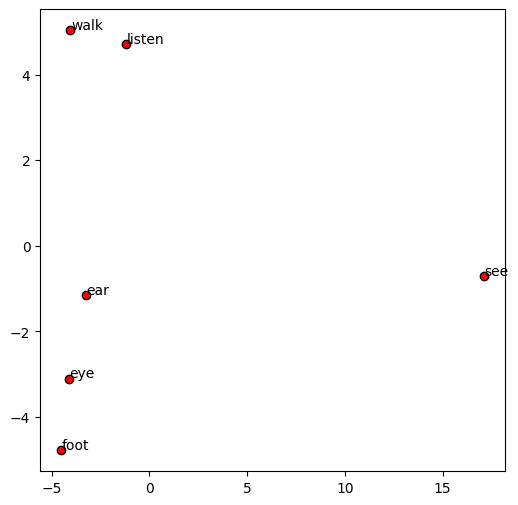

In [108]:
display_scatterplot(wv_text8, my_words_in_voc)

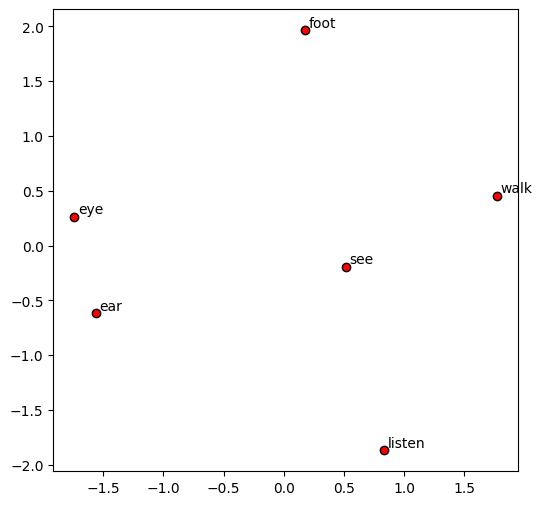

In [109]:
display_scatterplot(wv_model, my_words_in_voc)  # assuming they are in the larger vocabulary

## End of Lab 6
Please make sure all cells have been executed, save this completed notebook, compress it to a *zip* file, and upload it to [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).